# Вариант 7. 
Построить зависимость объема продаж от цены открытия по 15-
минутным интервалам EURRUR15.csv.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
FILENAME = "EURRUR15.csv"
PATH = Path(".") / "data" / FILENAME

In [3]:
input_df = pd.read_csv(PATH, header=None)
input_df.head()

,0,1,2,3,4,5,6
0,2009.08.03,07:00,44.82260,44.83740,44.78275,44.83355,447
1,2009.08.03,07:15,44.83335,44.83340,44.75840,44.81015,681
2,2009.08.03,07:30,44.80960,44.83125,44.73250,44.81850,1370
3,2009.08.03,07:45,44.81935,44.83070,44.45970,44.47420,726
4,2009.08.03,08:00,44.45635,44.48530,44.37150,44.39925,1612


In [4]:
old_headers = range(0, 7)
new_headers = ["date", "time", "open", "high", "low", "close", "volume"]
columns = {
    old_header: new_header for old_header, new_header in zip(old_headers, new_headers)
}

df = input_df.rename(columns=columns)
df["timestamp"] = pd.to_datetime(df.date + " " + df.time)
df.drop(["date", "time"], axis=1, inplace=True)
df.set_index("timestamp", inplace=True)

df.head()

,open,high,low,close,volume
timestamp,,,,,
2009-08-03 07:00:00,44.82260,44.83740,44.78275,44.83355,447
2009-08-03 07:15:00,44.83335,44.83340,44.75840,44.81015,681
2009-08-03 07:30:00,44.80960,44.83125,44.73250,44.81850,1370
2009-08-03 07:45:00,44.81935,44.83070,44.45970,44.47420,726
2009-08-03 08:00:00,44.45635,44.48530,44.37150,44.39925,1612


In [5]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

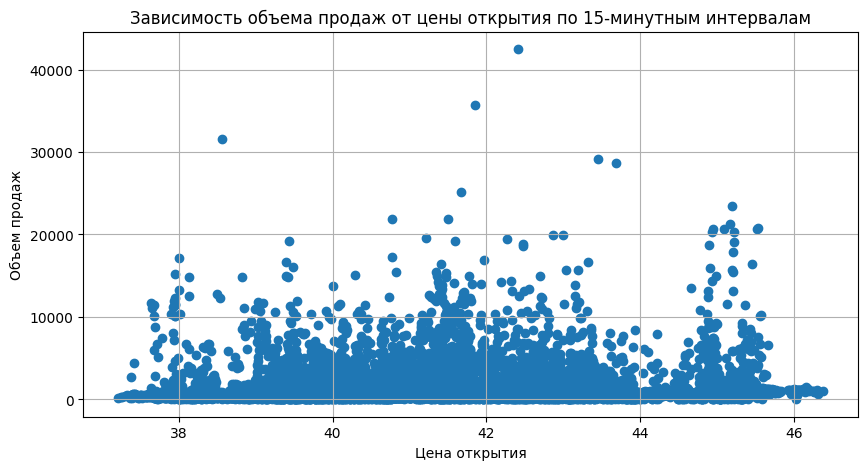

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df.open, df.volume)
plt.title("Зависимость объема продаж от цены открытия по 15-минутным интервалам")
plt.xlabel("Цена открытия")
plt.ylabel("Объем продаж")
plt.grid()
plt.show()